In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
normal_files=os.listdir(r'D:\sem 8\Pneumonia-Detection-using-CNN-main\Pneumonia-Detection-using-CNN-main\chest_xray\test\NORMAL')

print(normal_files[0:5])
print(normal_files[-5:])

['IM-0001-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0007-0001.jpeg']
['NORMAL2-IM-0374-0001.jpeg', 'NORMAL2-IM-0376-0001.jpeg', 'NORMAL2-IM-0378-0001.jpeg', 'NORMAL2-IM-0380-0001.jpeg', 'NORMAL2-IM-0381-0001.jpeg']


In [4]:
Pneumonia_files=os.listdir(r'D:\sem 8\Pneumonia-Detection-using-CNN-main\Pneumonia-Detection-using-CNN-main\chest_xray\test\PNEUMONIA')

print(Pneumonia_files[0:5])
print(Pneumonia_files[-5:])

['person100_bacteria_475.jpeg', 'person100_bacteria_477.jpeg', 'person100_bacteria_478.jpeg', 'person100_bacteria_479.jpeg', 'person100_bacteria_480.jpeg']
['person96_bacteria_465.jpeg', 'person96_bacteria_466.jpeg', 'person97_bacteria_468.jpeg', 'person99_bacteria_473.jpeg', 'person99_bacteria_474.jpeg']


In [5]:
print('Normal: ', len(normal_files))
print('Pneumonia: ',len(Pneumonia_files))

Normal:  234
Pneumonia:  390


### Creating labels
- 0 --> Normal
- 1 --> Pneumonia

In [6]:
Normal_label=[0]*234
Pneumonia_label=[1]*390

In [7]:
print('Normal labels: ',len(Normal_label))
print('Pneumonia labels: ',len(Pneumonia_label))

Normal labels:  234
Pneumonia labels:  390


In [8]:
print('With Normal labels: ', Normal_label[0:5])
print('Without Pneumonia labels: ', Pneumonia_label[0:5])

With Normal labels:  [0, 0, 0, 0, 0]
Without Pneumonia labels:  [1, 1, 1, 1, 1]


Combining both labels into a single column

In [9]:
labels=Normal_label + Pneumonia_label

print('Labels are: ',len(labels))

print(labels[0:5])
print(labels[-5:])

Labels are:  624
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [10]:
type(labels)

list

### Normal image

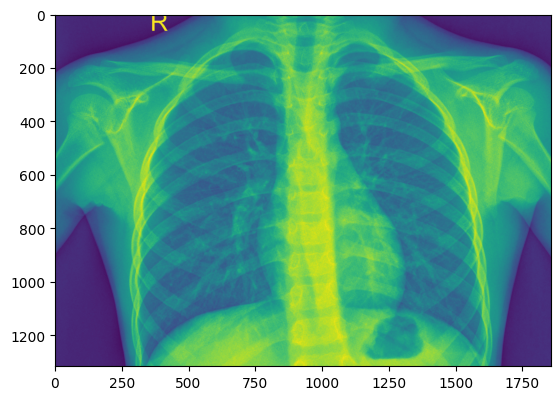

In [11]:
image=mpimg.imread(r'D:\sem 8\Pneumonia-Detection-using-CNN-main\Pneumonia-Detection-using-CNN-main\chest_xray\test\NORMAL\IM-0001-0001.jpeg')
plt.imshow(image)

plt.show()

### Pneumonia image

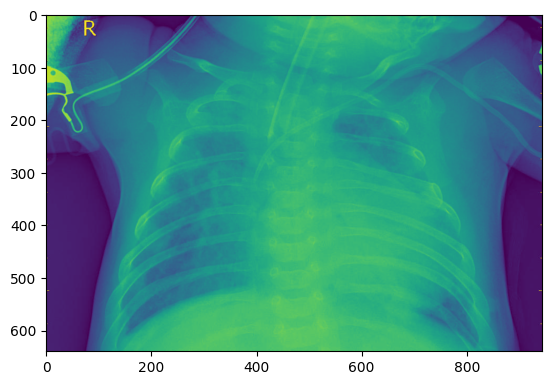

In [12]:
image=mpimg.imread(r'D:\sem 8\Pneumonia-Detection-using-CNN-main\Pneumonia-Detection-using-CNN-main\chest_xray\test\PNEUMONIA\person1_virus_6.jpeg')
plt.imshow(image)

plt.show()

### Image Processing

In [13]:
normal_path=(r'D:\sem 8\Pneumonia-Detection-using-CNN-main\Pneumonia-Detection-using-CNN-main\chest_xray\test\NORMAL/')
data=[]

for img_file in normal_files:
    image=Image.open(normal_path +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
    
Pneumonia_path=(r'D:\sem 8\Pneumonia-Detection-using-CNN-main\Pneumonia-Detection-using-CNN-main\chest_xray\test\PNEUMONIA/')

for img_file in Pneumonia_files:
    image=Image.open(Pneumonia_path + img_file )
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [14]:
type(data)

list

In [15]:
len(data)

624

In [16]:
data[0]

array([[[31, 31, 31],
        [32, 32, 32],
        [31, 31, 31],
        ...,
        [31, 31, 31],
        [32, 32, 32],
        [31, 31, 31]],

       [[31, 31, 31],
        [32, 32, 32],
        [31, 31, 31],
        ...,
        [30, 30, 30],
        [31, 31, 31],
        [30, 30, 30]],

       [[31, 31, 31],
        [32, 32, 32],
        [31, 31, 31],
        ...,
        [32, 32, 32],
        [32, 32, 32],
        [30, 30, 30]],

       ...,

       [[28, 28, 28],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [33, 33, 33]],

       [[28, 28, 28],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [33, 33, 33],
        [33, 33, 33],
        [32, 32, 32]],

       [[28, 28, 28],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [33, 33, 33],
        [33, 33, 33],
        [32, 32, 32]]], dtype=uint8)

In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[0].shape

(128, 128, 3)

### Converting data and labels into numpy array

In [19]:
X=np.array(data)
Y=np.array(labels)

In [20]:
type(X)

numpy.ndarray

In [21]:
type(Y)

numpy.ndarray

In [22]:
print(X.shape)
print(Y.shape)

(624, 128, 128, 3)
(624,)


### Train Test Split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(624, 128, 128, 3) (499, 128, 128, 3) (125, 128, 128, 3)


### Scaled the data

In [24]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [26]:
X_train[0]

array([[[ 42,  42,  42],
        [ 45,  45,  45],
        [ 49,  49,  49],
        ...,
        [167, 167, 167],
        [158, 158, 158],
        [170, 170, 170]],

       [[ 44,  44,  44],
        [ 45,  45,  45],
        [ 49,  49,  49],
        ...,
        [161, 161, 161],
        [159, 159, 159],
        [167, 167, 167]],

       [[ 46,  46,  46],
        [ 46,  46,  46],
        [ 49,  49,  49],
        ...,
        [160, 160, 160],
        [161, 161, 161],
        [172, 172, 172]],

       ...,

       [[ 12,  12,  12],
        [  7,   7,   7],
        [ 27,  27,  27],
        ...,
        [ 24,  24,  24],
        [ 26,  26,  26],
        [ 38,  38,  38]],

       [[ 13,  13,  13],
        [  7,   7,   7],
        [ 31,  31,  31],
        ...,
        [ 24,  24,  24],
        [ 27,  27,  27],
        [ 40,  40,  40]],

       [[ 13,  13,  13],
        [  7,   7,   7],
        [ 34,  34,  34],
        ...,
        [ 23,  23,  23],
        [ 27,  27,  27],
        [ 40,  40,  40]]

In [27]:
X_train_scaled[0]

array([[[0.16470588, 0.16470588, 0.16470588],
        [0.17647059, 0.17647059, 0.17647059],
        [0.19215686, 0.19215686, 0.19215686],
        ...,
        [0.65490196, 0.65490196, 0.65490196],
        [0.61960784, 0.61960784, 0.61960784],
        [0.66666667, 0.66666667, 0.66666667]],

       [[0.17254902, 0.17254902, 0.17254902],
        [0.17647059, 0.17647059, 0.17647059],
        [0.19215686, 0.19215686, 0.19215686],
        ...,
        [0.63137255, 0.63137255, 0.63137255],
        [0.62352941, 0.62352941, 0.62352941],
        [0.65490196, 0.65490196, 0.65490196]],

       [[0.18039216, 0.18039216, 0.18039216],
        [0.18039216, 0.18039216, 0.18039216],
        [0.19215686, 0.19215686, 0.19215686],
        ...,
        [0.62745098, 0.62745098, 0.62745098],
        [0.63137255, 0.63137255, 0.63137255],
        [0.6745098 , 0.6745098 , 0.6745098 ]],

       ...,

       [[0.04705882, 0.04705882, 0.04705882],
        [0.02745098, 0.02745098, 0.02745098],
        [0.10588235, 0

### Model Training

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [31]:
history=model.fit(X_train_scaled,Y_train, validation_split=0.1, verbose=1, epochs=5)

Epoch 1/5


15/15 [==============================] - 28s 1s/step - loss: 0.7972 - acc: 0.5590 - val_loss: 0.6633 - val_acc: 0.7200
Epoch 2/5
15/15 [==============================] - 13s 670ms/step - loss: 0.6670 - acc: 0.6281 - val_loss: 0.6917 - val_acc: 0.2800
Epoch 3/5
15/15 [==============================] - 23s 2s/step - loss: 0.5899 - acc: 0.7016 - val_loss: 0.2833 - val_acc: 0.9200
Epoch 4/5
15/15 [==============================] - 15s 1s/step - loss: 0.4179 - acc: 0.8218 - val_loss: 0.2486 - val_acc: 0.8800
Epoch 5/5
15/15 [==============================] - 10s 646ms/step - loss: 0.3550 - acc: 0.8641 - val_loss: 0.1310 - val_acc: 0.9800


Accuracy

In [32]:
loss,accuracy=model.evaluate(X_test_scaled, Y_test)

4/4 [==============================] - 1s 201ms/step - loss: 0.3238 - acc: 0.8800


Accuracy is 95.98%

### Visualization

#### Loss

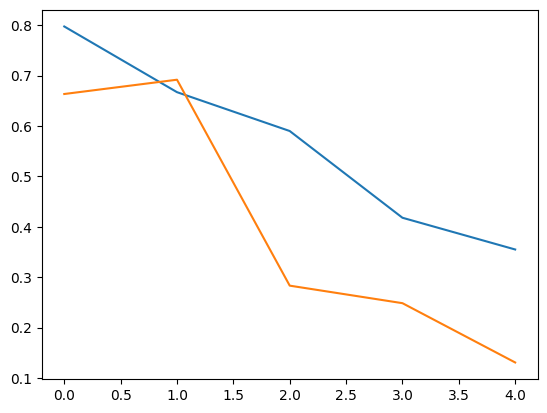

In [33]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')

#### Accuracy

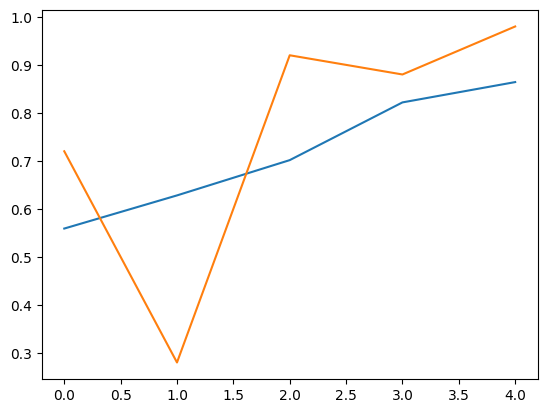

In [34]:
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')

In [35]:
y_pred=model.predict(X_test)

4/4 [==============================] - 1s 109ms/step


In [36]:
np.argmax(y_pred[89])

1

In [37]:
Y_test[89]

1

### Prediction 

#### Testing Pneumonia

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

# Ensure the shape matches the expected input shape of your model
input_image_resized = cv2.resize(input_image, (128, 128))

# Normalize the pixel values
input_image_normalized = input_image_resized / 255.0

# Reshape for model prediction
input_image_reshaped = np.reshape(input_image_normalized, (1, 128, 128, 3))

# Make predictions
input_prediction = model.predict(input_image_reshaped)

# Display the prediction probabilities
print("Prediction Probabilities:", input_prediction)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Display the predicted label
if input_pred_label == 1:
    print('Pneumonia ')
else:
    print('Not Pneumonia')

#### Testing Normal 

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

# Ensure the shape matches the expected input shape of your model
input_image_resized = cv2.resize(input_image, (128, 128))

# Normalize the pixel values
input_image_normalized = input_image_resized / 255.0

# Reshape for model prediction
input_image_reshaped = np.reshape(input_image_normalized, (1, 128, 128, 3))

# Make predictions
input_prediction = model.predict(input_image_reshaped)

# Display the prediction probabilities
print("Prediction Probabilities:", input_prediction)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Display the predicted label
if input_pred_label == 1:
    print('Pneumonia ')
else:
    print('Not Pneumonia')

### Saving The model

In [46]:
from tensorflow.keras.models import load_model

model.save(r'D:\sem 8\Pneumonia-Detection-using-CNN-main\Pneumonia-Detection-using-CNN-main\model/Pneumonia_model.h5')

loaded_model = load_model(r'D:\sem 8\Pneumonia-Detection-using-CNN-main\Pneumonia-Detection-using-CNN-main\model/Pneumonia_model.h5')

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
